In [1]:
import sys
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from functools import partial

In [2]:
# Import data, custom figure-making functions
sys.path.append('/mnt/d/orchards')
from figure_constants import *
from figure_functions import *
sys.path.append(installDir+'scripts')
from chartannotator import add_stat_annotation
multiple_annotation_method=None

loading subjects...
loading samples...
loading segments...
loading genes...
loading SNPs...
loading transmission pairs...
loading transmission segments...
loading transmission SNPs...
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (58) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [3]:
sns.set_theme(context='paper', style='white', font_scale=3)
pi = '\u03C0'
rcParams['font.sans-serif'] = 'Myriad Pro'


ax_letter_args = {'pad':30}
x_labelpad = 12
y_labelpad = 12

In [4]:
font_annotation_size = rcParams['font.size'] * .66
sigBar = partial(add_stat_annotation, **{'fontsize':font_annotation_size})


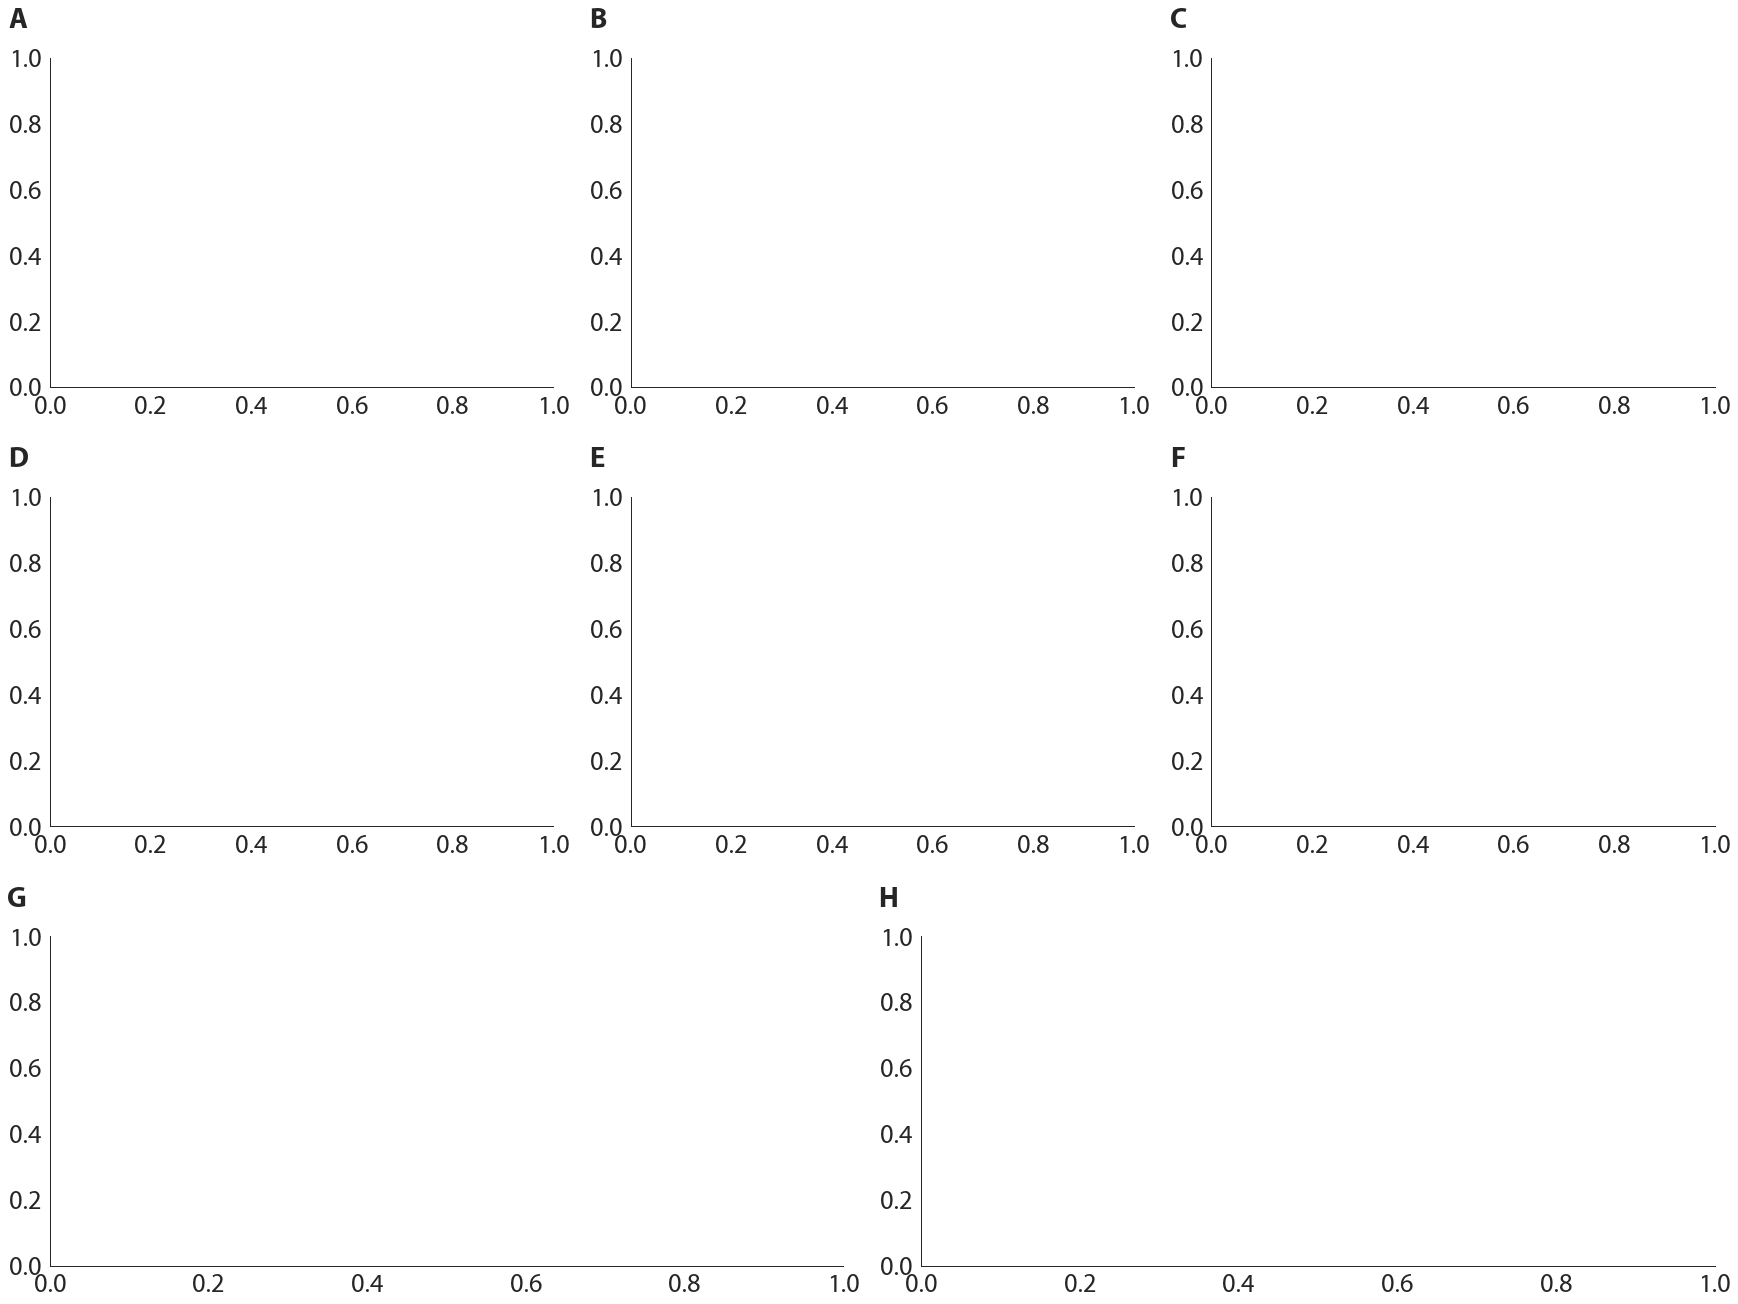

In [5]:
fig1 = plt.figure(figsize = (24,18), constrained_layout=True)
fig1.set_constrained_layout_pads(hspace=0.05, wspace=0.05)
gs = GridSpec(3,6,fig1)

ax1a = fig1.add_subplot(gs[0, 0:2])
ax1b = fig1.add_subplot(gs[0, 2:4])
ax1c = fig1.add_subplot(gs[0, 4:6])
ax1d = fig1.add_subplot(gs[1, 0:2])
ax1e = fig1.add_subplot(gs[1, 2:4])
ax1f = fig1.add_subplot(gs[1, 4:6])
ax1g = fig1.add_subplot(gs[2, 0:3])
ax1h = fig1.add_subplot(gs[2, 3:6])

plt.rcParams['axes.titleweight'] = 'bold'
sns.despine(fig1)

figure_letter_x_offset = -35

def calc_figure_letter_offset(ax):
    return figure_letter_x_offset/ax.get_window_extent().width

ax1a.set_title('A', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1a))
ax1b.set_title('B', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1b))
ax1c.set_title('C', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1c))
ax1d.set_title('D', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1d))
ax1e.set_title('E', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1e))
ax1f.set_title('F', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1f))
ax1g.set_title('G', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1g))
ax1h.set_title('H', loc='left', **ax_letter_args).set_x(calc_figure_letter_offset(ax1h))

In [6]:
samples['num_of_snps'].replace(np.nan, 0, inplace=True)

In [7]:
significanceComparisons = [('Influenza B','H3N2'),('Influenza B','H1N1'), ('H3N2','H1N1')]
ax1a.clear()
ax1a = sns.swarmplot('subtype','num_of_snps',data=samples, order = subtypeOrder, palette=palettes['subtype'], ax=ax1a)
ax1a = addStatsLines(ax1a, 'subtype','num_of_snps',data=samples, order = subtypeOrder, linewidth=2)

ax1a, stats = sigBar(ax1a, line_height=.03,line_offset=.1, data=samples, x='subtype', y='num_of_snps', mult_comp_correction=multiple_annotation_method, order = subtypeOrder,box_pairs=significanceComparisons, test='bootstrap')

ax1a.set_xlabel('Subtype',labelpad=x_labelpad)
ax1a.set_ylabel('Number of iSNVs', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')
fig1

/home/jlalli/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
bootstrapping...
Influenza B: 7.0, H3N2: 13.0
Influenza B is less than H3N2: Non-parametric bootstrapped two-sided comparison, P_val=0.44 stat=1.00e+05
(means: Influenza B is less than H3N2: 15.424242424242424 vs 17.492822966507177)
bootstrapping...
Influenza B: 7.0, H1N1: 21.0
Influenza B is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.044 stat=1.00e+05
(means: Influenza B is less than H1N1: 15.424242424242424 vs 21.49473684210526)
bootstrapping...
H3N2: 13.0, H1N1: 21.0
H3N2 is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.035 stat=1.00e+05
(means: H3N2 is less than H1N1: 17.492822966507177 vs 21.494736

<Figure size 432x288 with 0 Axes>

In [8]:
#Fig 1b Pi diversity by subtype
ax1b.set_yscale('log')

ax1b_fig_settings = {'x': 'subtype',
                     'y': 'pi_sample',
                     'data': samples.loc[samples.pi_sample<1],
                     'order': subtypeOrder,
                     'palette': palettes['subtype'],
                     'ax': ax1b}

ax1b = swarmplot_with_zeros(ax1b_fig_settings, fig1, .2, gap_between_data_and_zero = .5)


ax1b = addStatsLines(ax1b, 'subtype','pi_sample',data=samples, order = subtypeOrder)

comparisons = [('H3N2','H1N1'),('Influenza B','H3N2'),('Influenza B','H1N1')]

sigBar(ax1b, x='subtype', y='pi_sample',data=samples, box_pairs=comparisons, order=subtypeOrder, test='bootstrap', text_offset=2)

ax1b.set_ylabel(f'{pi} Diversity',labelpad=x_labelpad)
ax1b.set_xlabel('Subtype',labelpad=y_labelpad)

fig1

bootstrapping...
H3N2: 6.613154586809809e-05, H1N1: 7.931574726373511e-05
H3N2 is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.66 stat=1.00e+05
(means: H3N2 is less than H1N1: 8.80768696935899e-05 vs 9.185379046772295e-05)
bootstrapping...
Influenza B: 3.4163240808155986e-05, H3N2: 6.613154586809809e-05
Influenza B is less than H3N2: Non-parametric bootstrapped two-sided comparison, P_val=0.14 stat=1.00e+05
(means: Influenza B is less than H3N2: 6.763884703163398e-05 vs 8.80768696935899e-05)
bootstrapping...
Influenza B: 3.4163240808155986e-05, H1N1: 7.931574726373511e-05
Influenza B is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.098 stat=1.00e+05
(means: Influenza B is less than H1N1: 6.763884703163398e-05 vs 9.185379046772295e-05)


<Figure size 432x288 with 0 Axes>

In [9]:
#Fig 1e: Divergence per subtype
ax1e.set_yscale('log')

math_args = {'x': 'subtype',
            'y': 'divergence_rate',
            'data': samples,
            'order': subtypeOrder,
            'ax':ax1e}
fig_args = math_args.copy()
fig_args['data'] = samples.loc[samples.Xue_divergence_per_day >= 0]
ax1e = swarmplot_with_zeros(fig_args, fig1, spacing=.2, gap_between_data_and_zero = .5)

addStatsLines(**math_args)

comparisons = [('H3N2','H1N1'), ('Influenza B','H3N2'), ('Influenza B','H1N1')]

sigBar(box_pairs=comparisons, test='bootstrap', mult_comp_correction=multiple_annotation_method, **math_args)

ax1e.set_ylabel('Divergence Rate', labelpad=x_labelpad)
ax1e.set_xlabel('Subtype', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', bbox='tight',format='svg')

bootstrapping...
H3N2: 1.0540657761577856e-05, H1N1: 1.1073857652501387e-05
H3N2 is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.43 stat=1.00e+05
(means: H3N2 is less than H1N1: 1.3681143280129026e-05 vs 1.495068253918592e-05)
bootstrapping...
Influenza B: 6.2109603882679405e-06, H3N2: 1.0540657761577856e-05
Influenza B is less than H3N2: Non-parametric bootstrapped two-sided comparison, P_val=0.027 stat=1.00e+05
(means: Influenza B is less than H3N2: 9.260162156034527e-06 vs 1.3681143280129026e-05)
bootstrapping...
Influenza B: 6.2109603882679405e-06, H1N1: 1.1073857652501387e-05
Influenza B is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.011 stat=1.00e+05
(means: Influenza B is less than H1N1: 9.260162156034527e-06 vs 1.495068253918592e-05)
<ipython-input-9-994004b388a9>:21: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor r

<Figure size 432x288 with 0 Axes>

In [10]:
fig1

In [11]:
#Fig 1c SFS of mutations
rcParams['legend.frameon'] = False

SNPs['AAtype_encoded'] = SNPs.AAtype.map({'Synonymous':0, 'Nonsynonymous':1,'Out of reading frame':2})
freqs = []
freqs.append(SNPs.loc[(SNPs.AAtype=='Synonymous'), 'transformed_frequency'].values)
freqs.append(SNPs.loc[(SNPs.AAtype=='Nonsynonymous'), 'transformed_frequency'].values)
freqs.append(SNPs.loc[(SNPs.AAtype=='Out of reading frame'), 'transformed_frequency'].values)

ax1c.hist(freqs, bins=np.arange(0,0.525,0.025),histtype='bar', color=[snsblue, snsorange, snsgreen],stacked=False, width = .0065,log=True, linewidth=0)
ax1c.set_xlabel('iSNV within-host frequency', labelpad=x_labelpad)
ax1c.set_ylabel('log (# of iSNVs observed)', labelpad=y_labelpad)
ax1c.legend(['Nonsynonymous','Synonymous', 'Out of reading frame'])
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')

In [12]:
#fig 1g: number of snps by days since symptom onset

fig_args = {'x': 'days_since_symptom_onset',
            'y': 'num_of_snps',
            'data': samples,
            'ax': ax1g}

ax1g = sns.regplot(x_estimator=np.mean, color='grey', **fig_args)
addRegStats(**fig_args)
ax1g.set_xlim(-0.5,13.5)

ax1g.set_ylabel('Number of iSNVs', labelpad=x_labelpad)
ax1g.set_xlabel('Days Since Symptom Onset', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')

In [13]:
#fig 1h: overall sample pi by days since symptom onset

fig_args = {'x': 'days_since_symptom_onset',
            'y': 'pi_sample',
            'data': samples.loc[(samples.mutation_rate_samp<1)],
            'ax': ax1h}

ax1h = sns.regplot(x_estimator=np.mean, color='grey', **fig_args)
addRegStats(**fig_args)
ax1h.set_xlim(-0.5,13.5)

ax1h.set_ylabel(f'{pi} Diversity', labelpad=x_labelpad)
ax1h.set_xlabel('Days Since Symptom Onset', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')

['H3N2', 'H1N1', 'Influenza B']
bootstrapping...
H3N2: 0.0002560140016384, H1N1: 0.0003721899657585
H3N2 is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.048 stat=1.00e+05
(means: H3N2 is less than H1N1: 0.00037478968108340695 vs 0.0004675198204855845)
bootstrapping...
Influenza B: 0.0001824151769427, H3N2: 0.0002560140016384
Influenza B is less than H3N2: Non-parametric bootstrapped two-sided comparison, P_val=0.067 stat=1.00e+05
(means: Influenza B is less than H3N2: 0.0002712965680891327 vs 0.00037478968108340695)
bootstrapping...
Influenza B: 0.0001824151769427, H1N1: 0.0003721899657585
Influenza B is less than H1N1: Non-parametric bootstrapped two-sided comparison, P_val=0.0023 stat=1.00e+05
(means: Influenza B is less than H1N1: 0.0002712965680891327 vs 0.0004675198204855845)


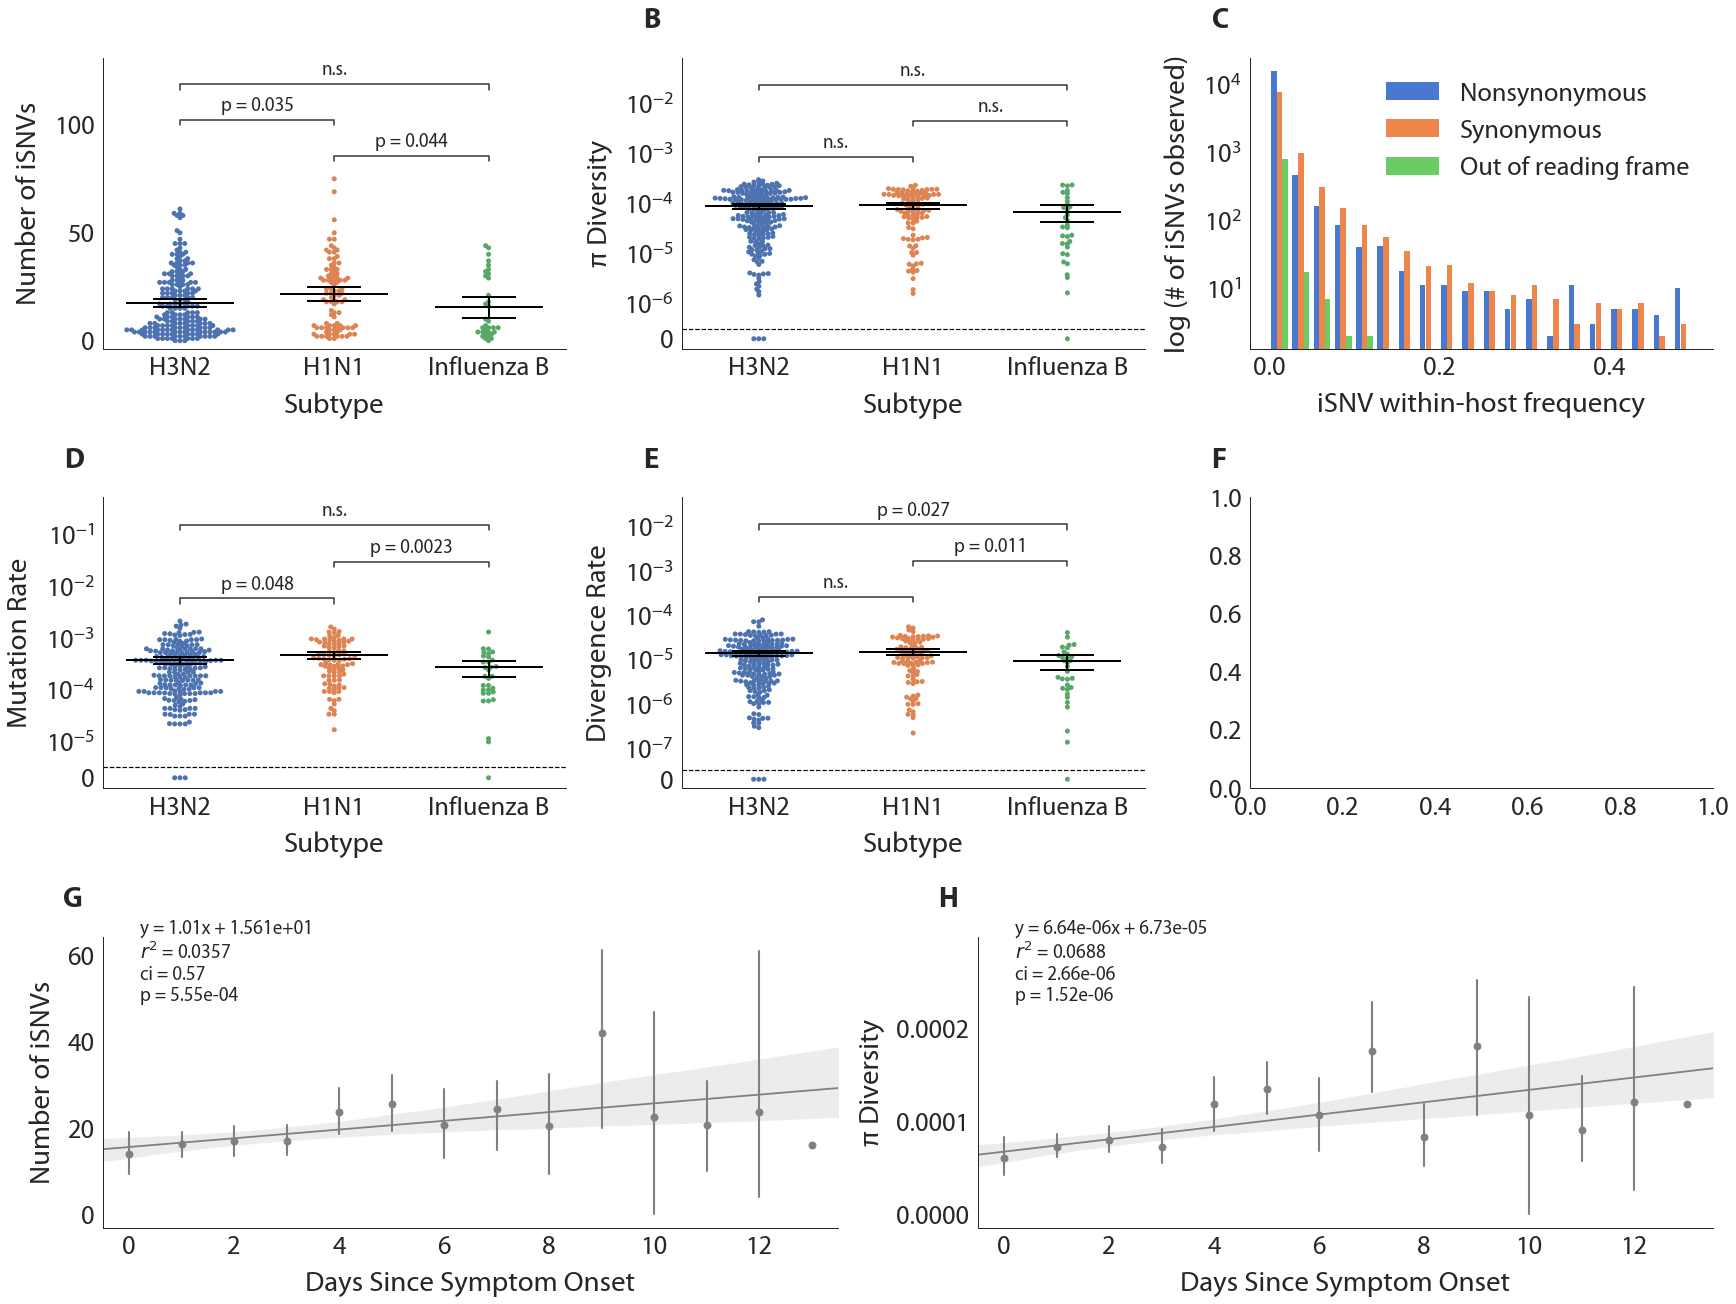

<Figure size 432x288 with 0 Axes>

In [14]:
#fig 1d: mutation rate of each sample broken out by subtype

fig_args = {'x': 'subtype',
            'y': 'mutation_rate_samp',
            'data': samples.loc[samples.mutation_rate_samp<1],
            'order': subtypeOrder,
            'palette': palettes['subtype'],
            'ax': ax1d}
print (subtypeOrder)
ax1d.set_yscale('log')

ax1d = swarmplot_with_zeros(fig_args, fig1, .2, gap_between_data_and_zero = -.5)

del fig_args['palette']

addStatsLines(**fig_args)

comparisons = [('H3N2','H1N1'),('Influenza B','H3N2'),('Influenza B','H1N1')]

sigBar(test='bootstrap',box_pairs=comparisons, **fig_args)

ax1d.set_ylabel('Mutation Rate', labelpad=x_labelpad)
ax1d.set_xlabel('Subtype', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')
fig1

In [27]:
samples['season']

0      16-17
1      16-17
2      16-17
3      16-17
4      16-17
       ...  
332    18-19
333    18-19
334    18-19
335    18-19
336    18-19
Name: season, Length: 337, dtype: object

In [25]:
#fig 1f: overall pi of antigenic and nonantigenic regions of HA within hosts
comparisons = [('HA_nonantigenic', 'HA_antigenic')]
order = ['HA_nonantigenic', 'HA_antigenic']

genes['pi_gene'] = (genes.piN_gene*genes.N_sites_gene + genes.piS_gene*genes.S_sites_gene)/(genes.N_sites_gene+genes.S_sites_gene)

fig_args = {'x': 'product',
            'y': 'divergence_rate_gene',
            'order': order,
            'data': genes.loc[genes['product'].isin(order)&(genes.divergence_rate_gene<.01)],
            'ax': ax1f}
math_args = fig_args.copy()
math_args['data'] = genes.loc[genes['product'].isin(order)]

ax1f.set_yscale('log')
ax1f = swarmplot_with_zeros(fig_args, fig1, .2, dotsize=4, gap_between_data_and_zero=.5, jitter_zeros=True)

addStatsLines(**math_args, method='mean')
sigBar(box_pairs=comparisons, test='bootstrap', **math_args)

ax1f.set_xticklabels(['Nonantigenic','Antigenic'])
ax1f.set_xlabel('HA region',labelpad=x_labelpad)
ax1f.set_ylabel('Divergence Rate', labelpad=y_labelpad)
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')
fig1

bootstrapping...
HA_nonantigenic: 4.509438784824917e-06, HA_antigenic: 0.0
HA_nonantigenic is greater than HA_antigenic: Non-parametric bootstrapped two-sided comparison, P_val=0.27 stat=1.00e+05
(means: HA_nonantigenic is greater than HA_antigenic: 1.453879418233134e-05 vs 1.191515867822682e-05)


<Figure size 432x288 with 0 Axes>

In [20]:
fig1.savefig('/mnt/d/orchards/fig1.svg', format='svg')
fig1